In [4]:
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=VH2OIPC5NKDGRNFJ9LW5W2KSU3YP4T
%env CLEARML_API_SECRET_KEY=Ixtz1NVs8wKDzNfyakkHIHHWN_Oy4vuzwbza8gu2za5SZpcl62e3s6v3s7uN9SzKbII

env: CLEARML_WEB_HOST=https://app.clear.ml/
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=VH2OIPC5NKDGRNFJ9LW5W2KSU3YP4T
env: CLEARML_API_SECRET_KEY=Ixtz1NVs8wKDzNfyakkHIHHWN_Oy4vuzwbza8gu2za5SZpcl62e3s6v3s7uN9SzKbII


In [5]:
from clearml import Task

task = Task.init(project_name="Rosneft segmentation", task_name="Experiment 3")

Retrying (Retry(total=239, connect=239, read=240, redirect=240, status=240)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc1ed35aa10>: Failed to establish a new connection: [Errno 101] Network is unreachable')': /auth.login


ClearML Task: overwriting (reusing) task id=db6e413a245c447189183375eb93e218
2025-03-06 10:18:51,184 - clearml.Repository Detection - WARNING - Could not read Jupyter Notebook: No module named 'nbconvert'
2025-03-06 10:18:51,186 - clearml.Repository Detection - WARNING - Please install nbconvert using "pip install nbconvert"
2025-03-06 10:18:51,191 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/22b883860266496ab579545df2f458ef/experiments/db6e413a245c447189183375eb93e218/output/log


2025-03-06 10:57:55,436 - clearml.storage - INFO - Uploading: 2454.53MB to /home/dmatveev/workdir/rosneft_segmentation/notebooks/checkpoint_epoch_1.pt


██████████████████████████▉ 100% | 2454.53/2454.53 MB [02:32<00:00, 16.14MB/s]: 


In [6]:
# api {
#   # Daniel Matveev's workspace
#   web_server: https://app.clear.ml/
#   api_server: https://api.clear.ml
#   files_server: https://files.clear.ml
#   credentials {
#     "access_key" = "VH2OIPC5NKDGRNFJ9LW5W2KSU3YP4T"
#     "secret_key" = "Ixtz1NVs8wKDzNfyakkHIHHWN_Oy4vuzwbza8gu2za5SZpcl62e3s6v3s7uN9SzKbII"
#   }
# }

In [3]:
import torch
import gc
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'


def clear_gpu_memory():
    gc.collect()
    torch.cuda.empty_cache()

clear_gpu_memory()


In [7]:
import os
import torch
import gc
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'


def clear_gpu_memory():
    gc.collect()
    torch.cuda.empty_cache()

import os
import sys

import cv2
import random
import numpy as np
from PIL import Image
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm

from transformers import SamModel, SamProcessor
from peft import get_peft_model, LoraConfig, TaskType


sys.path.append(os.path.abspath('/home/dmatveev/workdir/rosneft_segmentation/experiments'))

from prepare_data import SegmentationDataset, SeismicDataset

/home/dmatveev/workdir/rosneft_segmentation/for_rosneft/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
def custom_collate(batch):
    return {
        "filename": [item[0] for item in batch],
        "seismic_img": [item[1] for item in batch],
        "label": [item[2] for item in batch]
    }

In [9]:
train_config = {
    "model": {
        "pretrained": "facebook/sam-vit-huge", 
        "use_lora": True,
        "lora_config": { 
            "r": 64,
            "lora_alpha": 64,
            "target_modules": ["q_proj", "k_proj", "v_proj", "out_proj"],
            "lora_dropout": 0.1,
            "bias": "none",
            "task_type": "FEATURE_EXTRACTION"
        },
        "freeze_base": True
    },
    "training": {
        "epochs": 2,
        "batch_size": 4,
        "lr": 1e-4,
        "num_workers": 2,
        "log_interval": 10,
        "use_mask": True 
    },
    "data": {
        "type": "2D",
        "seismic_dir": "/home/dmatveev/workdir/rosneft_segmentation/data/sabamrine/seismic",
        "label_dir": "/home/dmatveev/workdir/rosneft_segmentation/data/sabamrine/label",
        "shape": (256, 256),
        "mask_dtype": np.uint8
    },
    "clearml": {
        "project_name": "SAM Fine Tuning",
        "task_name": "LoRA Training"
    }
}

task.connect(train_config)

2025-03-06 10:19:05,346 - clearml.Task - WARNING - Parameters must be of builtin type (General/data/mask_dtype[type])


{'model': {'pretrained': 'facebook/sam-vit-huge',
  'use_lora': True,
  'lora_config': {'r': 64,
   'lora_alpha': 64,
   'target_modules': ['q_proj', 'k_proj', 'v_proj', 'out_proj'],
   'lora_dropout': 0.1,
   'bias': 'none',
   'task_type': 'FEATURE_EXTRACTION'},
  'freeze_base': True},
 'training': {'epochs': 2,
  'batch_size': 4,
  'lr': 0.0001,
  'num_workers': 2,
  'log_interval': 10,
  'use_mask': True},
 'data': {'type': '2D',
  'seismic_dir': '/home/dmatveev/workdir/rosneft_segmentation/data/Salt2d/seismic',
  'label_dir': '/home/dmatveev/workdir/rosneft_segmentation/data/Salt2d/label',
  'shape': (224, 224),
  'mask_dtype': numpy.uint8},
 'clearml': {'project_name': 'SAM Fine Tuning', 'task_name': 'LoRA Training'}}

In [10]:
data_cfg = train_config["data"]

dataset = SegmentationDataset({
    "type": data_cfg.get("type", "2D"),
    "seismic_dir": data_cfg["seismic_dir"],
    "label_dir": data_cfg["label_dir"],
    "shape": data_cfg["shape"],
    "mask_dtype": data_cfg.get("mask_dtype", 0),
    "use_pil": True
})

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# val_dataset = dataset[-200:]

train_loader = DataLoader(
    train_dataset,
    batch_size=train_config["training"]["batch_size"],
    shuffle=True,
    num_workers=train_config["training"]["num_workers"],
    collate_fn=custom_collate
)
val_loader = DataLoader(
    val_dataset,
    batch_size=train_config["training"]["batch_size"],
    shuffle=False,
    num_workers=train_config["training"]["num_workers"],
    collate_fn=custom_collate
)

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SamModel.from_pretrained(train_config["model"]["pretrained"]).to(device)
processor = SamProcessor.from_pretrained(train_config["model"]["pretrained"])
model.eval()

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-31): 32 x SamVisionLayer(
        (layer_norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (layer_norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNor

In [12]:
def compute_metrics(pred, target, threshold=0.5):
    pred_bin = (pred > threshold).astype(np.uint8)
    target_bin = (target > threshold).astype(np.uint8)
    
    if pred_bin.sum() == 0 and target_bin.sum() == 0:
        return 1.0, 1.0

    intersection = np.logical_and(pred_bin, target_bin).sum()
    union = np.logical_or(pred_bin, target_bin).sum()
    iou = intersection / union if union != 0 else 0.0

    pred_sum = pred_bin.sum()
    target_sum = target_bin.sum()
    dice = (2.0 * intersection) / (pred_sum + target_sum) if (pred_sum + target_sum) != 0 else 0.0

    return iou, dice


ious = []
dices = []
with torch.no_grad():
    for batch in val_loader:
        labels = torch.stack([torch.tensor(lbl) for lbl in batch["label"]]).to(device)

        batch_input_points = []
        batch_input_labels = []  # new list for corresponding labels

        for label in labels.cpu().numpy():
            nonzero_indices = np.argwhere(label == 1)
            if len(nonzero_indices) > 0:
                idx = random.randint(0, len(nonzero_indices) - 1)
                y, x = nonzero_indices[idx]
                prompt_point = [[x, y]]
                prompt_label = [1]  # valid positive prompt
            else:
                prompt_point = [[0, 0]]  # dummy point
                prompt_label = [-1]     # label as padding (ignored by SAM)
            batch_input_points.append(prompt_point)
            batch_input_labels.append(prompt_label)

        inputs_val = processor(
                batch["seismic_img"],
                input_points=batch_input_points,
                input_labels=batch_input_labels,  # include the labels
                return_tensors="pt"
            )
        original_sizes = inputs_val["original_sizes"]
        reshaped_input_sizes = inputs_val["reshaped_input_sizes"]
        inputs_val = {k: v.to(device) for k, v in inputs_val.items()}

        outputs = model(**inputs_val, multimask_output=False)
        pred_logits = outputs.pred_masks[0, 0, 0, :, :]  # [B, H, W]

        if pred_logits.shape[-2:] != labels.shape[-2:]:
            pad_size = train_config["data"].get("pad_size", {"height": 1024, "width": 1024})
            target_image_size = (pad_size["height"], pad_size["width"])
            pred_logits = F.interpolate(pred_logits.unsqueeze(1), size=target_image_size, mode="bilinear", align_corners=False).squeeze(1)
            
            pred_logits_list = []
            for i, rs in enumerate(reshaped_input_sizes):
                cropped = pred_logits[i, :rs[0], :rs[1]]
                orig_size = labels[i].shape
                upsampled = F.interpolate(cropped.unsqueeze(0).unsqueeze(0), size=orig_size, mode="bilinear", align_corners=False).squeeze(0).squeeze(0)
                pred_logits_list.append(upsampled)
            pred_logits = torch.stack(pred_logits_list, dim=0)

        val_loss = F.binary_cross_entropy_with_logits(pred_logits, labels[0].float())

        pred_masks = (torch.sigmoid(pred_logits) > 0.5).float().cpu().numpy()
        labels_np = labels.cpu().numpy()
        for pred_mask, label in zip(pred_masks, labels_np):
            iou, dice = compute_metrics(pred_mask, label)
            ious.append(iou)
            dices.append(dice)

avg_iou = np.mean(ious) if ious else 0.0
avg_dice = np.mean(dices) if dices else 0.0
print(f"Validation - Average IoU: {avg_iou:.4f}, Average Dice: {avg_dice:.4f}")


/home/dmatveev/workdir/rosneft_segmentation/for_rosneft/lib/python3.11/site-packages/transformers/image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `SamImageProcessor.preprocess` and were ignored: 'point_pad_value'
  return self.preprocess(images, **kwargs)


Validation - Average IoU: 0.0652, Average Dice: 0.4382


In [13]:
# zero_count = 0

# for filename, pil_image, label in tqdm(train_dataset):
#     if np.all(label == 0):
#         zero_count += 1

# print("Количество изображений, маска которых состоит полностью из 0:", zero_count)

In [14]:
if train_config["model"]["freeze_base"]:
    for param in model.parameters():
        param.requires_grad = False

In [15]:
if train_config["model"]["use_lora"]:
    lora_cfg = train_config["model"]["lora_config"]
    lora_config = LoraConfig(
        r=lora_cfg["r"],
        lora_alpha=lora_cfg["lora_alpha"],
        target_modules=lora_cfg["target_modules"],
        lora_dropout=lora_cfg["lora_dropout"],
        bias=lora_cfg["bias"],
        task_type=TaskType.FEATURE_EXTRACTION
    )
    model = get_peft_model(model, lora_config)

print("Trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Trainable parameters: 753664


In [16]:
optimizer = torch.optim.AdamW(model.parameters(), lr=train_config["training"]["lr"])
num_epochs = 1
# num_epochs = train_config["training"]["epochs"]
log_interval = train_config["training"]["log_interval"]

In [17]:
epoch_losses = []

model.train()
for epoch in range(num_epochs):
    epoch_loss = 0.0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}", ncols=100)
    
    for batch_idx, batch in enumerate(pbar):
        optimizer.zero_grad()

        inputs = processor(batch["seismic_img"], return_tensors="pt")
        seismic_imgs = inputs["pixel_values"].to(device)
        
        # Convert labels to tensors
        labels = torch.tensor(batch["label"]).to(device)

        image_embeddings = model.get_image_embeddings(seismic_imgs)

        batch_prompts = []
        for label in labels.cpu().numpy():
            h, w = label.shape
            nonzero_indices = np.argwhere(label != 0)
            if len(nonzero_indices) > 0:
                idx = random.randint(0, len(nonzero_indices) - 1)
                y, x = nonzero_indices[idx]
                prompt_point = [[x, y]]
            else:
                prompt_point = [[w / 2.0, h / 2.0]]
            batch_prompts.append(prompt_point)

        prompt_inputs = processor(batch["seismic_img"], input_points=batch_prompts, return_tensors="pt")
        prompt_inputs = {k: v.to(device) for k, v in prompt_inputs.items()}
        prompt_inputs.pop("pixel_values", None) 
        prompt_inputs.update({"image_embeddings": image_embeddings})

        outputs = model(**prompt_inputs)
        pred_masks = outputs.pred_masks

        if pred_masks.ndim == 5:
            pred_logits, _ = pred_masks.max(dim=2)  # [B, 1, H, W]
            pred_logits = pred_logits.squeeze(1)
        elif pred_masks.ndim == 4:
            pred_logits, _ = pred_masks.max(dim=1)  # [B, H, W]
        elif pred_masks.ndim == 3:
            pred_logits, _ = pred_masks.max(dim=0)  # [H, W]
            pred_logits = pred_logits.unsqueeze(0)  # [1, H, W]
        else:
            raise ValueError(f"Unexpected pred_masks shape: {pred_masks.shape}")

        # Ensure prediction size matches the ground truth.
        if pred_logits.shape[-2:] != labels.shape[-2:]:
            pred_logits = F.interpolate(pred_logits.unsqueeze(1),
                                        size=labels.shape[-2:],
                                        mode="bilinear",
                                        align_corners=False).squeeze(1)

        loss = F.binary_cross_entropy_with_logits(pred_logits, labels.float())
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        current_iter = epoch * len(train_loader) + batch_idx
        if batch_idx % log_interval == 0:
            loss_value = loss.item()
            print(f"Epoch [{epoch+1}/{num_epochs}] Batch [{batch_idx}/{len(train_loader)}] Loss: {loss_value:.4f}")
            task.get_logger().report_scalar(title="Loss", series="train_batch", value=loss_value, iteration=current_iter)
    
    avg_loss = epoch_loss / len(train_loader)
    epoch_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] Average Loss: {avg_loss:.4f}")
    task.get_logger().report_scalar(title="Loss", series="train_epoch", value=avg_loss, iteration=epoch+1)
    
    # Generate and report a plot of loss evolution for this epoch
    plt.figure()
    plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, marker='o')
    plt.title("Training Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Average Loss")
    plt.grid(True)
    # Save plot locally
    loss_plot_path = f"loss_plot_epoch_{epoch+1}.png"
    plt.savefig(loss_plot_path)
    plt.close()
    task.get_logger().report_image(title="Loss Plot", series="train", local_path=loss_plot_path, iteration=epoch+1)
    
    # Save checkpoint artifact
    checkpoint_path = f"checkpoint_epoch_{epoch+1}.pt"
    torch.save({
        "epoch": epoch + 1,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "loss": avg_loss,
    }, checkpoint_path)
    task.upload_artifact(name=f"checkpoint_epoch_{epoch+1}", artifact_object=checkpoint_path)

Epoch 1:   0%|                                                              | 0/800 [00:00<?, ?it/s]

/home/dmatveev/workdir/rosneft_segmentation/for_rosneft/lib/python3.11/site-packages/transformers/image_processing_utils.py:42: UserWarning:

The following named arguments are not valid for `SamImageProcessor.preprocess` and were ignored: 'point_pad_value'

/tmp/ipykernel_319593/4186231292.py:15: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)

Epoch 1:   0%|                                                      | 1/800 [00:03<46:41,  3.51s/it]

Epoch [1/1] Batch [0/800] Loss: 3.0833


Epoch 1:   1%|▋                                                    | 11/800 [00:31<37:18,  2.84s/it]

Epoch [1/1] Batch [10/800] Loss: 1.9783


Epoch 1:   3%|█▍                                                   | 21/800 [01:00<36:46,  2.83s/it]

Epoch [1/1] Batch [20/800] Loss: 1.1121


Epoch 1:   4%|██                                                   | 31/800 [01:28<36:30,  2.85s/it]

Epoch [1/1] Batch [30/800] Loss: 0.6311


Epoch 1:   5%|██▋                                                  | 41/800 [01:57<35:47,  2.83s/it]

Epoch [1/1] Batch [40/800] Loss: 0.3291


Epoch 1:   6%|███▍                                                 | 51/800 [02:25<35:17,  2.83s/it]

Epoch [1/1] Batch [50/800] Loss: 0.3970


Epoch 1:   8%|████                                                 | 61/800 [02:53<34:57,  2.84s/it]

Epoch [1/1] Batch [60/800] Loss: 0.3753


Epoch 1:   9%|████▋                                                | 71/800 [03:21<34:21,  2.83s/it]

Epoch [1/1] Batch [70/800] Loss: 0.2711


Epoch 1:  10%|█████▎                                               | 81/800 [03:50<33:53,  2.83s/it]

Epoch [1/1] Batch [80/800] Loss: 0.4035


Epoch 1:  11%|██████                                               | 91/800 [04:18<33:21,  2.82s/it]

Epoch [1/1] Batch [90/800] Loss: 0.2060


Epoch 1:  13%|██████▌                                             | 101/800 [04:46<33:00,  2.83s/it]

Epoch [1/1] Batch [100/800] Loss: 0.2879


Epoch 1:  14%|███████▏                                            | 111/800 [05:15<32:35,  2.84s/it]

Epoch [1/1] Batch [110/800] Loss: 0.4409


Epoch 1:  15%|███████▊                                            | 121/800 [05:43<31:54,  2.82s/it]

Epoch [1/1] Batch [120/800] Loss: 0.3268


Epoch 1:  16%|████████▌                                           | 131/800 [06:11<31:34,  2.83s/it]

Epoch [1/1] Batch [130/800] Loss: 0.2578


Epoch 1:  18%|█████████▏                                          | 141/800 [06:40<30:55,  2.82s/it]

Epoch [1/1] Batch [140/800] Loss: 0.2411


Epoch 1:  19%|█████████▊                                          | 151/800 [07:08<30:28,  2.82s/it]

Epoch [1/1] Batch [150/800] Loss: 0.5851


Epoch 1:  20%|██████████▍                                         | 161/800 [07:36<30:02,  2.82s/it]

Epoch [1/1] Batch [160/800] Loss: 0.7399


Epoch 1:  21%|███████████                                         | 171/800 [08:04<29:34,  2.82s/it]

Epoch [1/1] Batch [170/800] Loss: 0.6724


Epoch 1:  23%|███████████▊                                        | 181/800 [08:32<29:07,  2.82s/it]

Epoch [1/1] Batch [180/800] Loss: 0.1466


Epoch 1:  24%|████████████▍                                       | 191/800 [09:01<28:42,  2.83s/it]

Epoch [1/1] Batch [190/800] Loss: 0.5695


Epoch 1:  25%|█████████████                                       | 201/800 [09:29<28:07,  2.82s/it]

Epoch [1/1] Batch [200/800] Loss: 0.2302


Epoch 1:  26%|█████████████▋                                      | 211/800 [09:57<27:52,  2.84s/it]

Epoch [1/1] Batch [210/800] Loss: 0.4748


Epoch 1:  28%|██████████████▎                                     | 221/800 [10:26<27:13,  2.82s/it]

Epoch [1/1] Batch [220/800] Loss: 0.2348


Epoch 1:  29%|███████████████                                     | 231/800 [10:54<26:45,  2.82s/it]

Epoch [1/1] Batch [230/800] Loss: 1.0103


Epoch 1:  30%|███████████████▋                                    | 241/800 [11:22<26:29,  2.84s/it]

Epoch [1/1] Batch [240/800] Loss: 0.3083


Epoch 1:  31%|████████████████▎                                   | 251/800 [11:50<26:03,  2.85s/it]

Epoch [1/1] Batch [250/800] Loss: 0.4421


Epoch 1:  33%|████████████████▉                                   | 261/800 [12:19<25:25,  2.83s/it]

Epoch [1/1] Batch [260/800] Loss: 0.0635


Epoch 1:  34%|█████████████████▌                                  | 271/800 [12:47<24:54,  2.82s/it]

Epoch [1/1] Batch [270/800] Loss: 0.0125


Epoch 1:  35%|██████████████████▎                                 | 281/800 [13:16<25:42,  2.97s/it]

Epoch [1/1] Batch [280/800] Loss: 0.2351


Epoch 1:  36%|██████████████████▉                                 | 291/800 [13:45<24:17,  2.86s/it]

Epoch [1/1] Batch [290/800] Loss: 0.1451


Epoch 1:  38%|███████████████████▌                                | 301/800 [14:13<23:32,  2.83s/it]

Epoch [1/1] Batch [300/800] Loss: 0.0616


Epoch 1:  39%|████████████████████▏                               | 311/800 [14:41<23:03,  2.83s/it]

Epoch [1/1] Batch [310/800] Loss: 0.2010


Epoch 1:  40%|████████████████████▊                               | 321/800 [15:09<22:31,  2.82s/it]

Epoch [1/1] Batch [320/800] Loss: 0.1909


Epoch 1:  41%|█████████████████████▌                              | 331/800 [15:38<22:04,  2.82s/it]

Epoch [1/1] Batch [330/800] Loss: 0.0848


Epoch 1:  43%|██████████████████████▏                             | 341/800 [16:06<21:38,  2.83s/it]

Epoch [1/1] Batch [340/800] Loss: 0.1870


Epoch 1:  44%|██████████████████████▊                             | 351/800 [16:34<21:14,  2.84s/it]

Epoch [1/1] Batch [350/800] Loss: 0.0041


Epoch 1:  45%|███████████████████████▍                            | 361/800 [17:03<20:57,  2.86s/it]

Epoch [1/1] Batch [360/800] Loss: 0.1997


Epoch 1:  46%|████████████████████████                            | 371/800 [17:31<20:06,  2.81s/it]

Epoch [1/1] Batch [370/800] Loss: 0.0581


Epoch 1:  48%|████████████████████████▊                           | 381/800 [18:00<19:44,  2.83s/it]

Epoch [1/1] Batch [380/800] Loss: 0.3451


Epoch 1:  49%|█████████████████████████▍                          | 391/800 [18:28<19:19,  2.83s/it]

Epoch [1/1] Batch [390/800] Loss: 0.0310


Epoch 1:  50%|██████████████████████████                          | 401/800 [18:56<18:49,  2.83s/it]

Epoch [1/1] Batch [400/800] Loss: 0.2553


Epoch 1:  51%|██████████████████████████▋                         | 411/800 [19:24<18:21,  2.83s/it]

Epoch [1/1] Batch [410/800] Loss: 0.0793


Epoch 1:  53%|███████████████████████████▎                        | 421/800 [19:53<18:03,  2.86s/it]

Epoch [1/1] Batch [420/800] Loss: 0.2814


Epoch 1:  54%|████████████████████████████                        | 431/800 [20:22<17:41,  2.88s/it]

Epoch [1/1] Batch [430/800] Loss: 0.3817


Epoch 1:  55%|████████████████████████████▋                       | 441/800 [20:51<17:09,  2.87s/it]

Epoch [1/1] Batch [440/800] Loss: 0.1636


Epoch 1:  56%|█████████████████████████████▎                      | 451/800 [21:19<16:39,  2.86s/it]

Epoch [1/1] Batch [450/800] Loss: 0.3258


Epoch 1:  58%|█████████████████████████████▉                      | 461/800 [21:48<16:13,  2.87s/it]

Epoch [1/1] Batch [460/800] Loss: 0.2304


Epoch 1:  59%|██████████████████████████████▌                     | 471/800 [22:16<15:38,  2.85s/it]

Epoch [1/1] Batch [470/800] Loss: 0.0894


Epoch 1:  60%|███████████████████████████████▎                    | 481/800 [22:45<15:05,  2.84s/it]

Epoch [1/1] Batch [480/800] Loss: 0.3863


Epoch 1:  61%|███████████████████████████████▉                    | 491/800 [23:13<14:33,  2.83s/it]

Epoch [1/1] Batch [490/800] Loss: 0.2259


Epoch 1:  63%|████████████████████████████████▌                   | 501/800 [23:41<14:03,  2.82s/it]

Epoch [1/1] Batch [500/800] Loss: 0.5207


Epoch 1:  64%|█████████████████████████████████▏                  | 511/800 [24:10<13:33,  2.81s/it]

Epoch [1/1] Batch [510/800] Loss: 0.2385


Epoch 1:  65%|█████████████████████████████████▊                  | 521/800 [24:38<13:08,  2.82s/it]

Epoch [1/1] Batch [520/800] Loss: 0.5386


Epoch 1:  66%|██████████████████████████████████▌                 | 531/800 [25:06<12:39,  2.82s/it]

Epoch [1/1] Batch [530/800] Loss: 0.1536


Epoch 1:  68%|███████████████████████████████████▏                | 541/800 [25:34<12:13,  2.83s/it]

Epoch [1/1] Batch [540/800] Loss: 0.1421


Epoch 1:  69%|███████████████████████████████████▊                | 551/800 [26:03<11:44,  2.83s/it]

Epoch [1/1] Batch [550/800] Loss: 0.5957


Epoch 1:  70%|████████████████████████████████████▍               | 561/800 [26:31<11:14,  2.82s/it]

Epoch [1/1] Batch [560/800] Loss: 0.0467


Epoch 1:  71%|█████████████████████████████████████               | 571/800 [26:59<10:49,  2.84s/it]

Epoch [1/1] Batch [570/800] Loss: 0.0947


Epoch 1:  73%|█████████████████████████████████████▊              | 581/800 [27:28<10:20,  2.83s/it]

Epoch [1/1] Batch [580/800] Loss: 0.0429


Epoch 1:  74%|██████████████████████████████████████▍             | 591/800 [27:56<09:59,  2.87s/it]

Epoch [1/1] Batch [590/800] Loss: 0.2331


Epoch 1:  75%|███████████████████████████████████████             | 601/800 [28:25<09:25,  2.84s/it]

Epoch [1/1] Batch [600/800] Loss: 0.5541


Epoch 1:  76%|███████████████████████████████████████▋            | 611/800 [28:53<08:56,  2.84s/it]

Epoch [1/1] Batch [610/800] Loss: 0.0841


Epoch 1:  78%|████████████████████████████████████████▎           | 621/800 [29:22<08:24,  2.82s/it]

Epoch [1/1] Batch [620/800] Loss: 0.0365


Epoch 1:  79%|█████████████████████████████████████████           | 631/800 [29:50<07:55,  2.82s/it]

Epoch [1/1] Batch [630/800] Loss: 0.0395


Epoch 1:  80%|█████████████████████████████████████████▋          | 641/800 [30:18<07:27,  2.81s/it]

Epoch [1/1] Batch [640/800] Loss: 1.0473


Epoch 1:  81%|██████████████████████████████████████████▎         | 651/800 [30:46<07:01,  2.83s/it]

Epoch [1/1] Batch [650/800] Loss: 0.1119


Epoch 1:  83%|██████████████████████████████████████████▉         | 661/800 [31:15<06:32,  2.83s/it]

Epoch [1/1] Batch [660/800] Loss: 0.1165


Epoch 1:  84%|███████████████████████████████████████████▌        | 671/800 [31:43<06:06,  2.84s/it]

Epoch [1/1] Batch [670/800] Loss: 0.2872


Epoch 1:  85%|████████████████████████████████████████████▎       | 681/800 [32:11<05:36,  2.82s/it]

Epoch [1/1] Batch [680/800] Loss: 0.0748


Epoch 1:  86%|████████████████████████████████████████████▉       | 691/800 [32:39<05:07,  2.82s/it]

Epoch [1/1] Batch [690/800] Loss: 0.1207


Epoch 1:  88%|█████████████████████████████████████████████▌      | 701/800 [33:08<04:38,  2.81s/it]

Epoch [1/1] Batch [700/800] Loss: 0.0888


Epoch 1:  89%|██████████████████████████████████████████████▏     | 711/800 [33:36<04:10,  2.82s/it]

Epoch [1/1] Batch [710/800] Loss: 0.1480


Epoch 1:  90%|██████████████████████████████████████████████▊     | 721/800 [34:04<03:44,  2.84s/it]

Epoch [1/1] Batch [720/800] Loss: 0.0721


Epoch 1:  91%|███████████████████████████████████████████████▌    | 731/800 [34:32<03:14,  2.82s/it]

Epoch [1/1] Batch [730/800] Loss: 0.1484


Epoch 1:  93%|████████████████████████████████████████████████▏   | 741/800 [35:01<02:47,  2.83s/it]

Epoch [1/1] Batch [740/800] Loss: 0.0486


Epoch 1:  94%|████████████████████████████████████████████████▊   | 751/800 [35:29<02:18,  2.82s/it]

Epoch [1/1] Batch [750/800] Loss: 0.0785


Epoch 1:  95%|█████████████████████████████████████████████████▍  | 761/800 [35:57<01:50,  2.83s/it]

Epoch [1/1] Batch [760/800] Loss: 0.1063


Epoch 1:  96%|██████████████████████████████████████████████████  | 771/800 [36:26<01:21,  2.82s/it]

Epoch [1/1] Batch [770/800] Loss: 0.2115


Epoch 1:  98%|██████████████████████████████████████████████████▊ | 781/800 [36:54<00:53,  2.83s/it]

Epoch [1/1] Batch [780/800] Loss: 0.0146


Epoch 1:  99%|███████████████████████████████████████████████████▍| 791/800 [37:22<00:25,  2.83s/it]

Epoch [1/1] Batch [790/800] Loss: 0.1749


Epoch 1: 100%|████████████████████████████████████████████████████| 800/800 [37:47<00:00,  2.83s/it]


Epoch [1/1] Average Loss: 0.3018
2025-03-06 10:57:33,608 - clearml.frameworks - INFO - Found existing registered model id=433b152e594441dd8e498fc99daef2e1 [/home/dmatveev/workdir/rosneft_segmentation/notebooks/checkpoint_epoch_1.pt] reusing it.


# test

In [18]:
def load_dat_file(filepath, shape=(224, 224)):
    data = np.fromfile(filepath, dtype=np.float32)
    return data.reshape(shape)

def to_pil_image(np_img):
    if np_img.dtype != np.uint8:
        if np_img.max() != np_img.min():
            np_img = (255 * (np_img - np_img.min()) / (np_img.max() - np_img.min())).astype(np.uint8)
        else:
            np_img = np_img.astype(np.uint8)
    return Image.fromarray(np_img)

def compute_metrics(pred, target, threshold=0.5):
    pred_bin = (pred > threshold).astype(np.uint8)
    target_bin = (target > threshold).astype(np.uint8)
    
    if pred_bin.sum() == 0 and target_bin.sum() == 0:
        return 1.0, 1.0

    intersection = np.logical_and(pred_bin, target_bin).sum()
    union = np.logical_or(pred_bin, target_bin).sum()
    iou = intersection / union if union != 0 else 0.0

    pred_sum = pred_bin.sum()
    target_sum = target_bin.sum()
    dice = (2.0 * intersection) / (pred_sum + target_sum) if (pred_sum + target_sum) != 0 else 0.0

    return iou, dice

In [19]:
dataset_path_test_temp = "/home/dmatveev/workdir/rosneft_segmentation/data/Salt2d"
seismic_dir_test_temp = os.path.join(dataset_path_test_temp, "seismic")
label_dir_test_temp   = os.path.join(dataset_path_test_temp, "label")
all_files_test_temp = sorted(os.listdir(seismic_dir_test_temp))
val_files_test_temp = all_files_test_temp[:10]

In [20]:
def display_four_images(image, gt_mask, pred_mask, chosen_point=None, threshold=0.5):
    """
    Отображает 4 изображения:
      1. Исходное изображение.
      2. Исходное изображение с отмеченной точкой (если она передана, иначе выбирается рандомно из GT маски).
      3. Ground truth маску (в оттенках серого).
      4. Предсказанную маску (в оттенках серого).
      
    Args:
      image: PIL.Image (RGB) или numpy-массив.
      gt_mask: 2D numpy-массив с ground truth маской.
      pred_mask: 2D numpy-массив с предсказанной моделью маской.
      chosen_point: Список [row, col] с координатами выбранной точки (если есть), иначе None.
      threshold: порог для определения положительных пикселей.
    """
    if isinstance(image, Image.Image):
        img_np = np.array(image)
    else:
        img_np = image.copy()

    point = chosen_point  # Используем реально выбранную точку

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # 1. Исходное изображение
    axes[0].imshow(img_np)
    axes[0].set_title("Исходное")
    axes[0].axis("off")
    
    # 2. Исходное изображение с отмеченной точкой
    if point is not None:
      axes[1].imshow(img_np)
      axes[1].scatter(point[1], point[0], color="green", marker="o", s=100)
      axes[1].set_title("С точкой (ground truth)")
      axes[1].axis("off")
    
    # 3. Ground truth маска
    axes[2].imshow(gt_mask, cmap="gray")
    axes[2].set_title("Ground Truth Маска")
    axes[2].axis("off")
    
    # 4. Предсказанная маска
    axes[3].imshow(pred_mask, cmap="gray")
    axes[3].set_title("Предсказанная Маска")
    axes[3].axis("off")
    
    plt.tight_layout()
    plt.show()

File: 0.dat, IoU: 0.0000, Dice: 0.0000


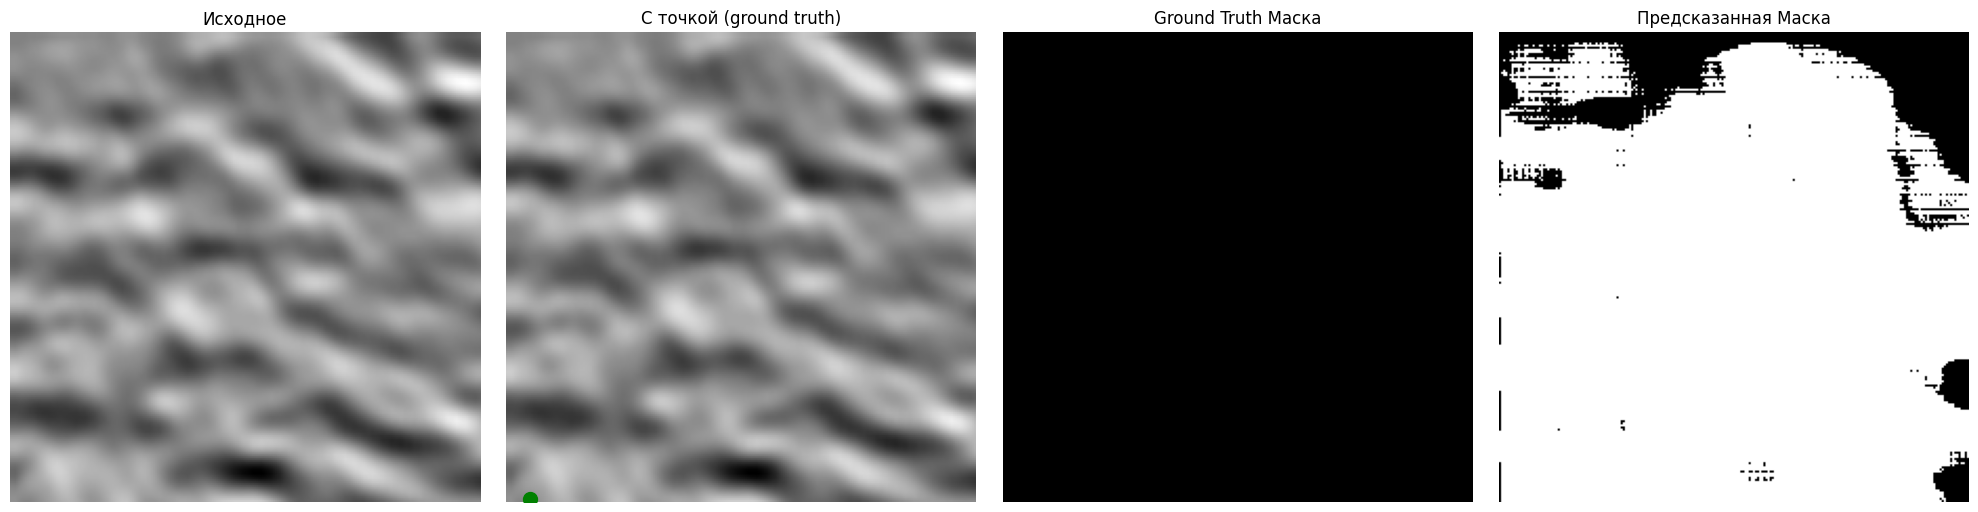

In [21]:
val_files_test_temp

File: 0.dat, IoU: 1.0000, Dice: 1.0000


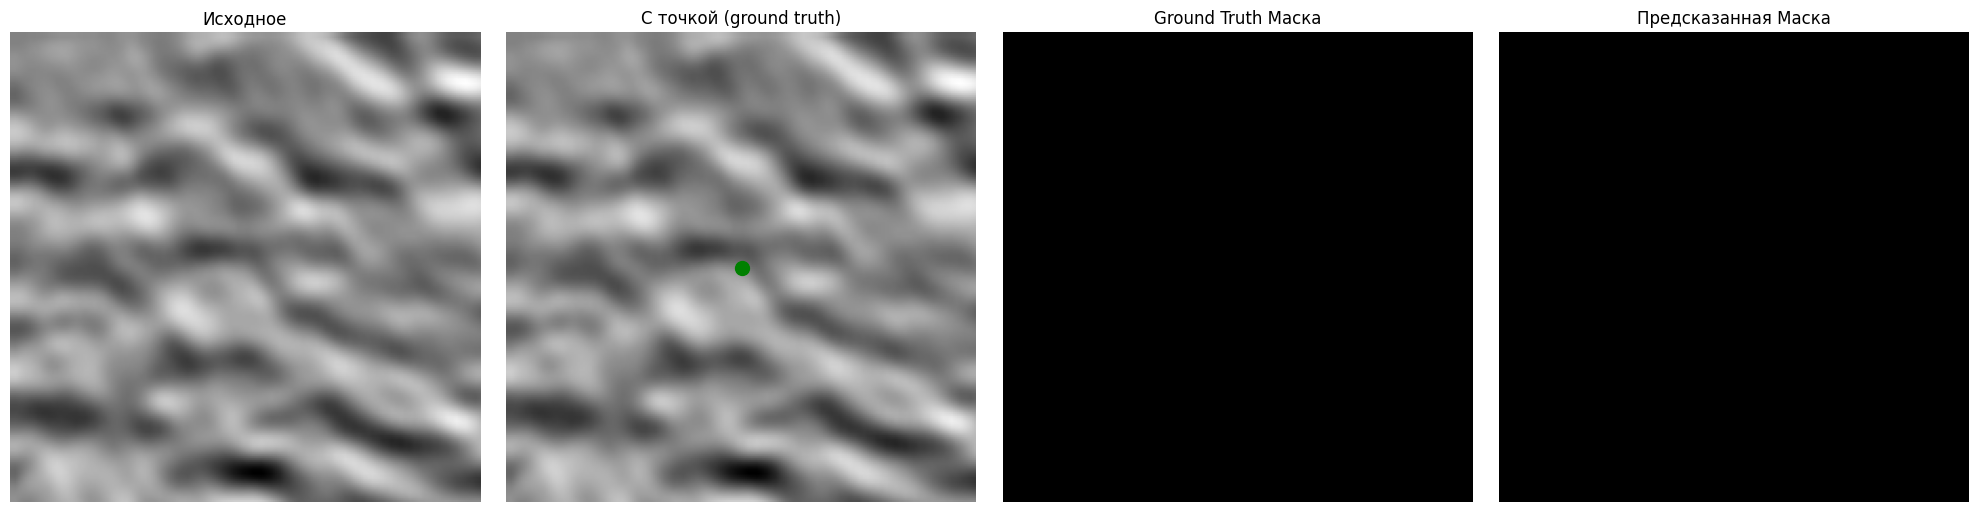

File: 1.dat, IoU: 0.0000, Dice: 0.0000


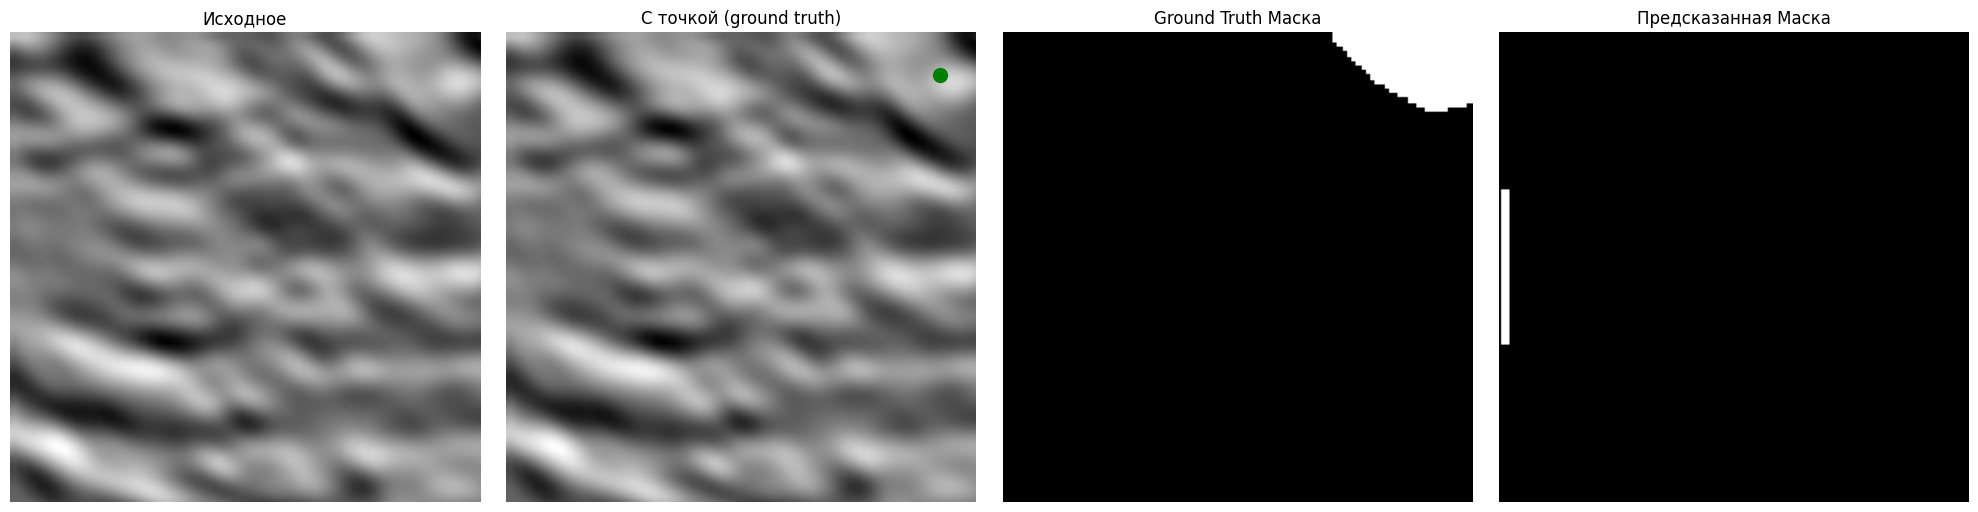

File: 10.dat, IoU: 0.0000, Dice: 0.0000


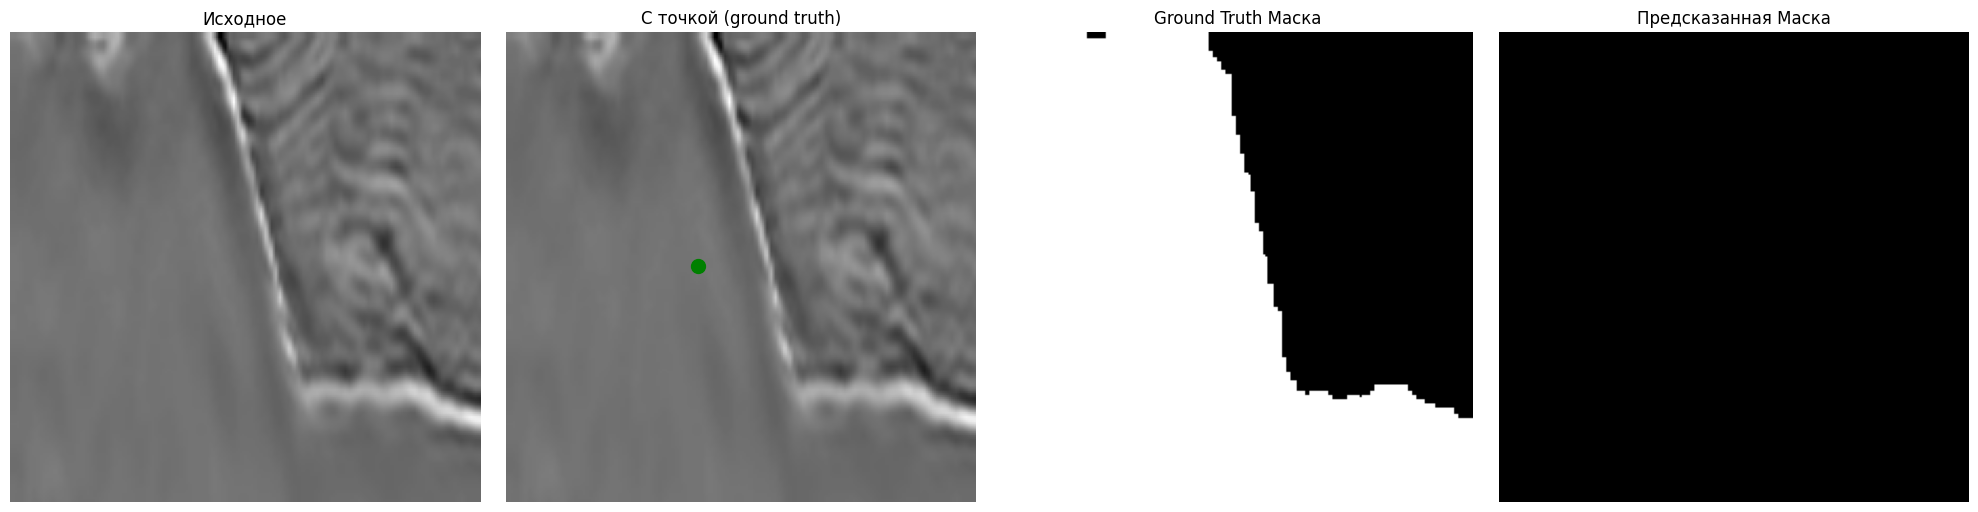

File: 100.dat, IoU: 1.0000, Dice: 1.0000


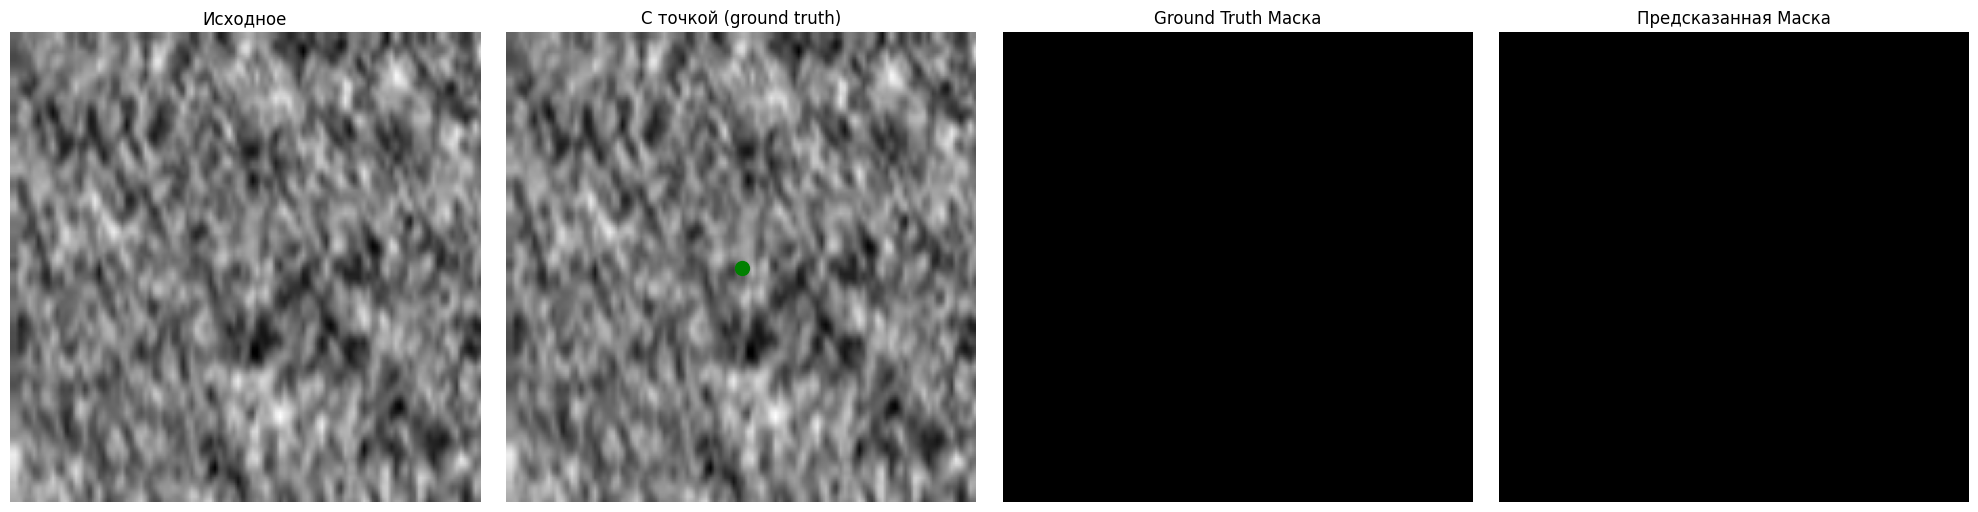

File: 1000.dat, IoU: 0.4451, Dice: 0.6160


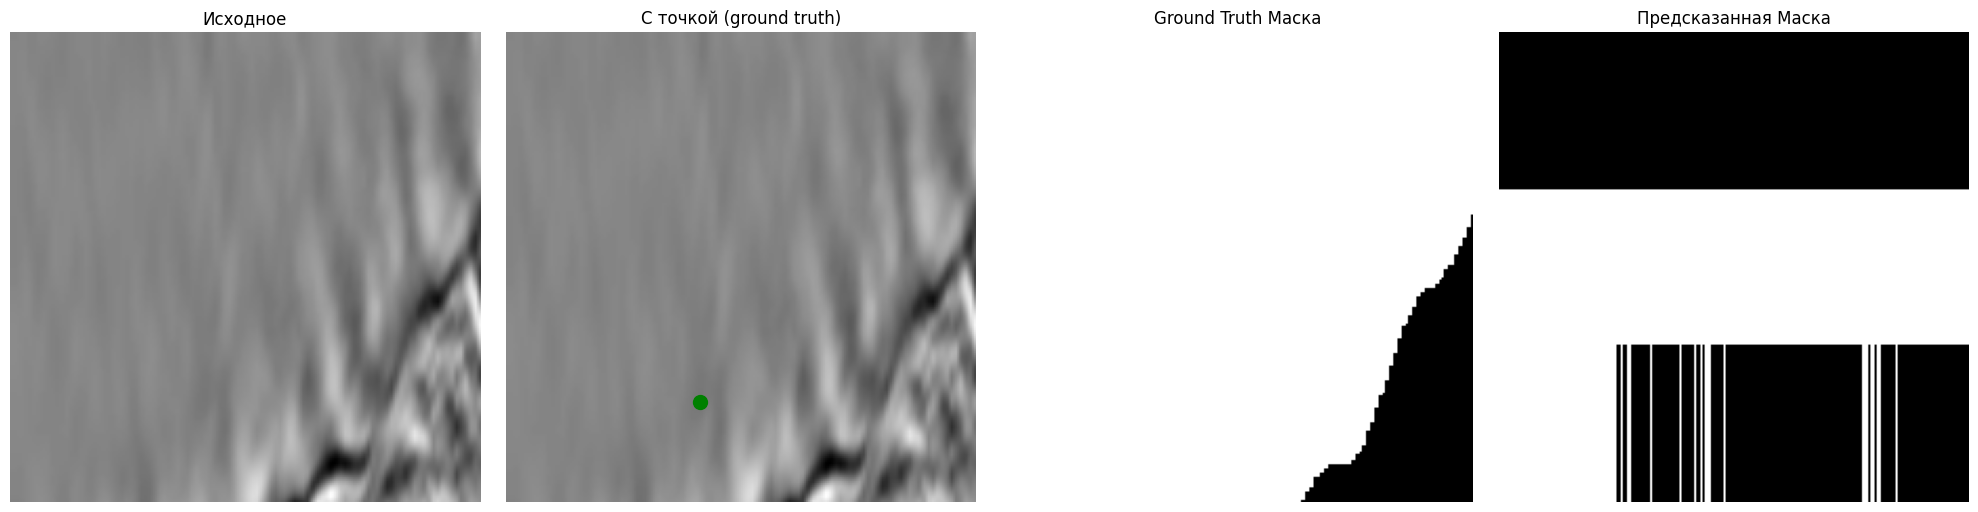

File: 1001.dat, IoU: 0.0085, Dice: 0.0169


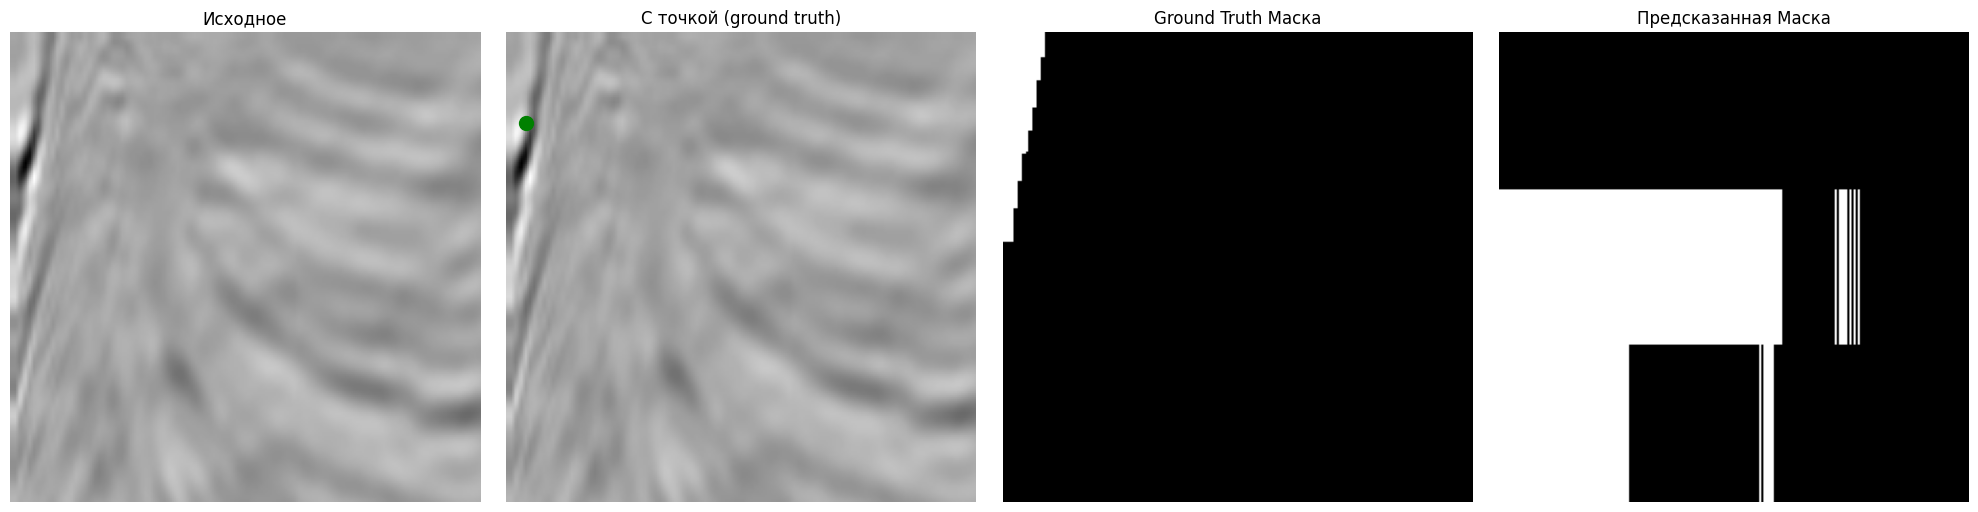

File: 1002.dat, IoU: 0.6078, Dice: 0.7560


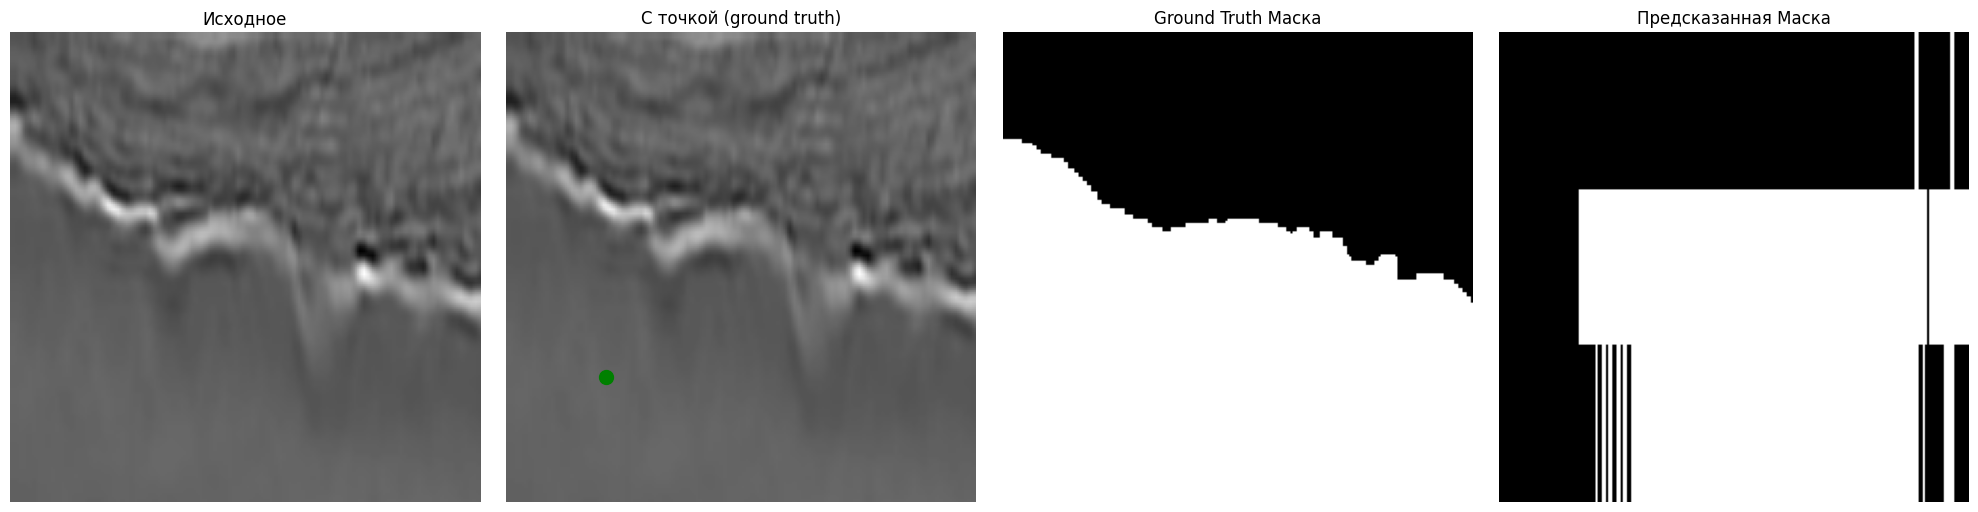

File: 1003.dat, IoU: 0.0000, Dice: 0.0000


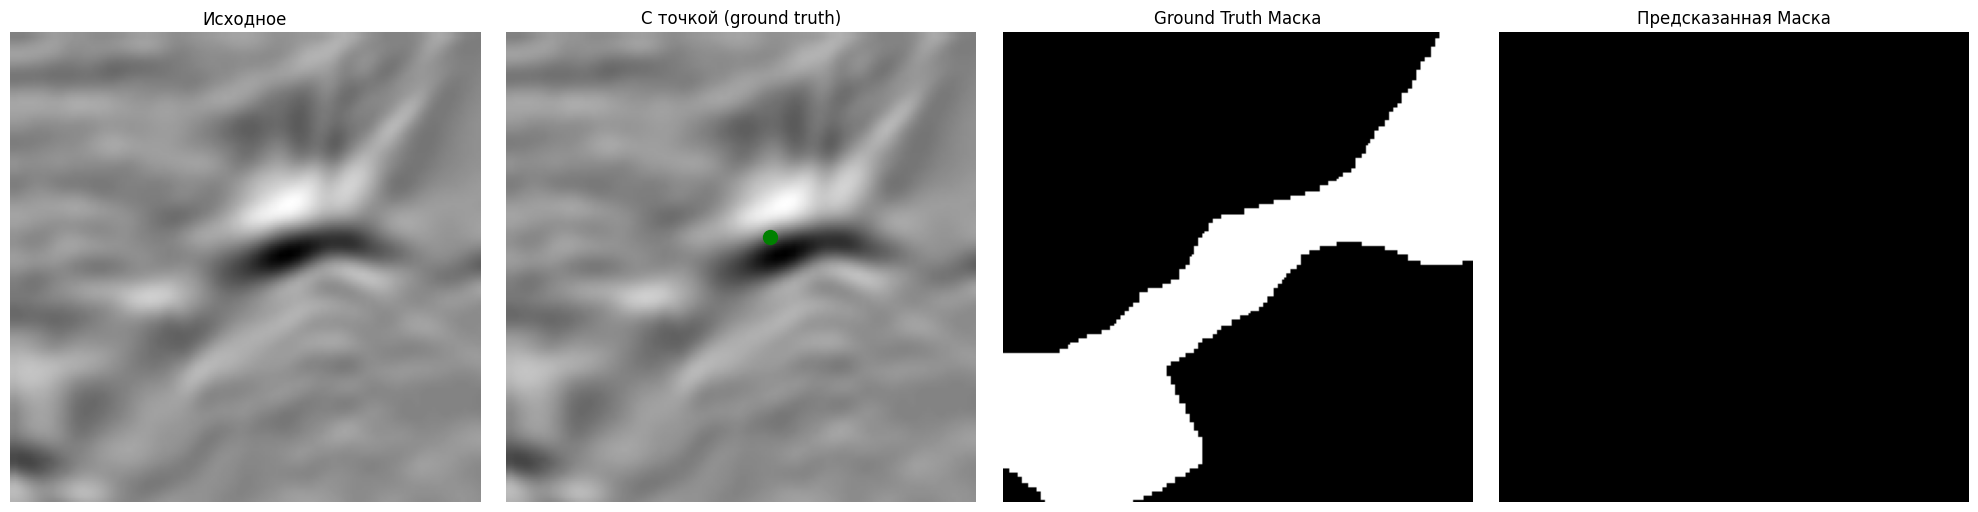

File: 1004.dat, IoU: 0.0395, Dice: 0.0760


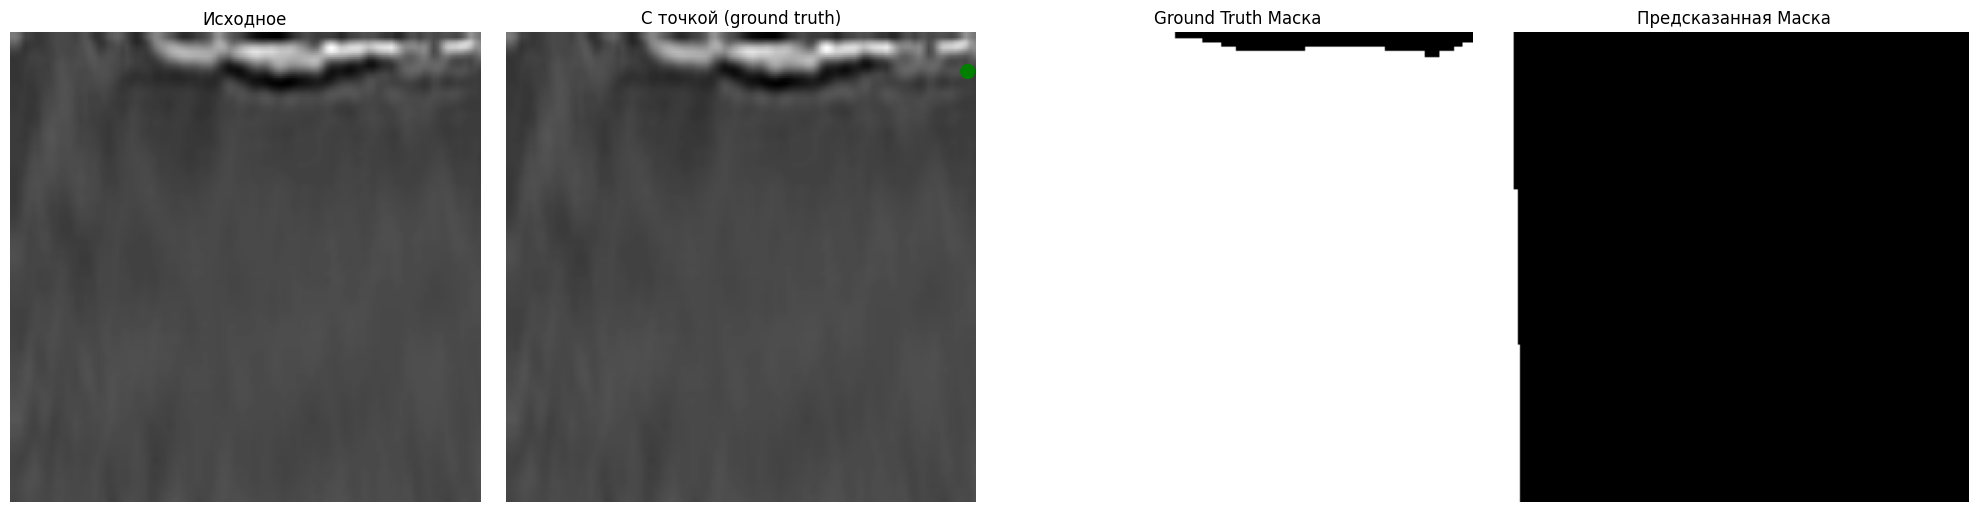

File: 1005.dat, IoU: 0.4831, Dice: 0.6514


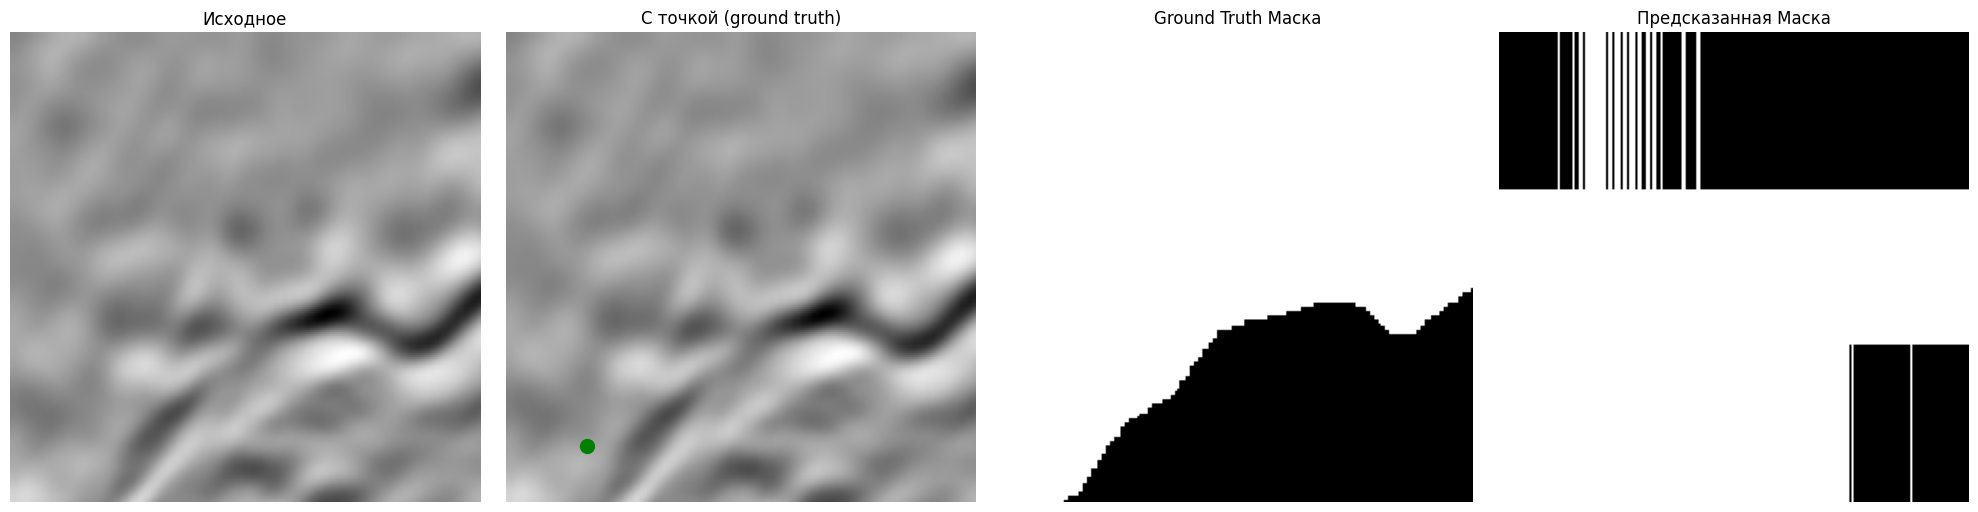

Среднее IoU: 0.5533, Средний Dice: 0.6402


In [23]:
ious = []
dices = []

for filename in val_files_test_temp:
    seismic_path = os.path.join(seismic_dir_test_temp, filename)
    label_path   = os.path.join(label_dir_test_temp, filename)

    seismic = load_dat_file(seismic_path)
    label   = load_dat_file(label_path)

    if seismic.ndim == 2:
        seismic_img = np.stack([seismic, seismic, seismic], axis=-1)
    else:
        seismic_img = seismic

    pil_image = to_pil_image(seismic_img).convert("RGB")

    pos_indices = np.argwhere(label > 0)
    if len(pos_indices) > 0:
        chosen_idx = random.choice(pos_indices)  # chosen_idx: [row, col]
        prompt_point = [[float(chosen_idx[1]), float(chosen_idx[0])]]  # формат: [x, y]
        chosen_point_for_display = chosen_idx.tolist()
        inputs = processor(pil_image, input_points=[prompt_point], return_tensors="pt").to(device)

    else:
        inputs = processor(pil_image, return_tensors="pt").to(device)

    
    with torch.no_grad():
        outputs = model(**inputs)
    channel = 0
    
    # print("outputs - ", outputs, sep="\n")

    # 5. Постобработка предсказанных масок
    masks = processor.image_processor.post_process_masks(
        outputs.pred_masks.cpu(),
        inputs["original_sizes"].cpu(),
        inputs["reshaped_input_sizes"].cpu()
    )
    # print("masks - ", masks, sep="\n")
    if len(masks) > 0 and len(masks[0]) > 0:
        pred_mask = masks[0][0]
        if isinstance(pred_mask, torch.Tensor):
            pred_mask = pred_mask.cpu().numpy()
        # Выводим оригинальную форму для отладки
        # print("Оригинальная форма pred_mask:", pred_mask.shape)
        pred_mask = np.squeeze(pred_mask)
        # Если после squeeze осталась 3D маска (например, (H, W, C)), берем первый канал.
        if pred_mask.ndim == 3 and pred_mask.shape[2] > 1:
            pred_mask = pred_mask[..., 0]
    else:
        pred_mask = np.zeros(label.shape, dtype=np.uint8)
    
        manual_masks.append(mask_final)

    # Извлекаем маску для первого изображения
    pred_mask = manual_masks[0]
    pred_mask = (pred_mask > 0.5).float().cpu().numpy()

    # Если размеры не совпадают, изменяем размер предсказанной маски
    if pred_mask.shape != label.shape:
        pred_mask = cv2.resize(pred_mask.astype(np.uint8), (label.shape[1], label.shape[0]))
    
    # Вычисляем метрики
    iou, dice = compute_metrics(pred_mask, label)
    ious.append(iou)
    dices.append(dice)
    print(f"File: {filename}, IoU: {iou:.4f}, Dice: {dice:.4f}")

    # Передаем в функцию отрисовки выбранную точку, если она есть
    display_four_images(pil_image, label, pred_mask, chosen_point=chosen_point_for_display)

print(f"Среднее IoU: {np.mean(ious):.4f}, Средний Dice: {np.mean(dices):.4f}")


In [24]:
sum(dices)/len(dices)

np.float64(0.4116412998047546)